# 2025-07-06 Data Hack

## Aufgabe
Übergewicht vorhersagen -> eigene Spalte

### imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Data

### import

In [63]:
all_data = pd.read_csv('data/train.csv')

In [64]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [65]:
all_data.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [66]:
all_data.head(10)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
8,8,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.000000,yes,1.000000,1.000000,no,Public_Transportation,Overweight_Level_I
9,9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III


In [67]:
all_data.isna().any().any()

False

In [68]:
all_data["NObeyesdad"].value_counts()

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [82]:
all_data["BMI"] = all_data["Weight"] / all_data["Height"] ** 2
all_data.head(10)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,28.259565
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,23.422091
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,17.126706
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,44.855798
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,25.599151
5,5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,16.861932
6,6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II,36.610787
7,7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II,38.591446
8,8,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.000000,yes,1.000000,1.000000,no,Public_Transportation,Overweight_Level_I,24.221453
9,9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III,41.431355


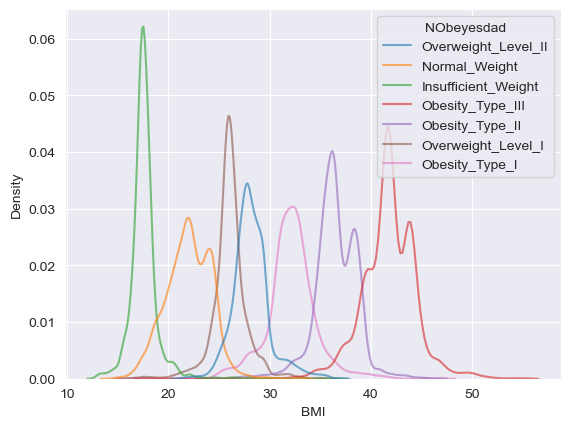

In [95]:
sns.kdeplot(all_data, x="BMI", hue="NObeyesdad", alpha=0.6)
plt.show()

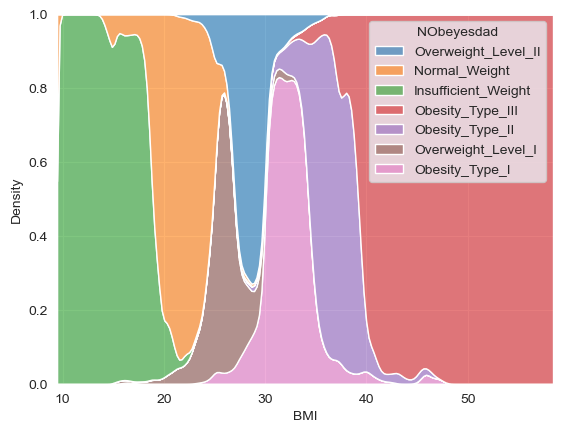

In [96]:
sns.kdeplot(all_data, x="BMI", hue="NObeyesdad", multiple="fill", alpha=0.6)
plt.show()

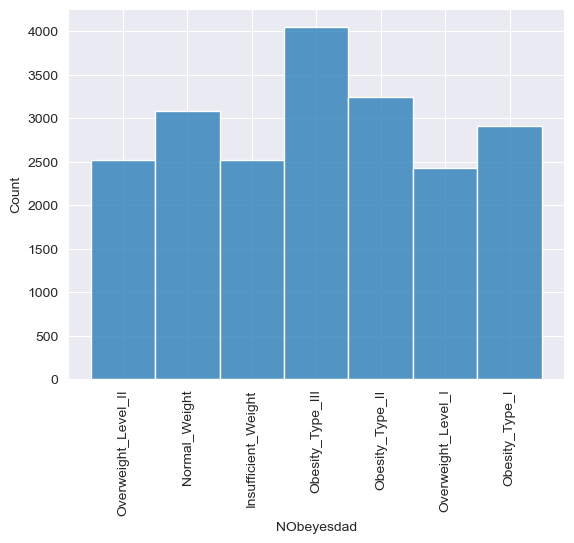

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(all_data["NObeyesdad"])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Height', ylabel='Weight'>

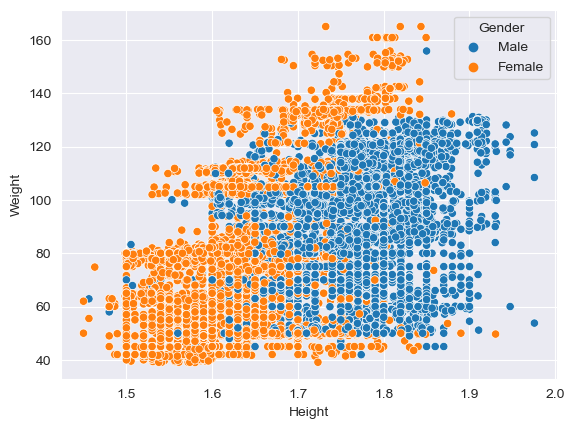

In [98]:
sns.scatterplot(x=all_data["Height"], y=all_data["Weight"], hue=all_data["Gender"])

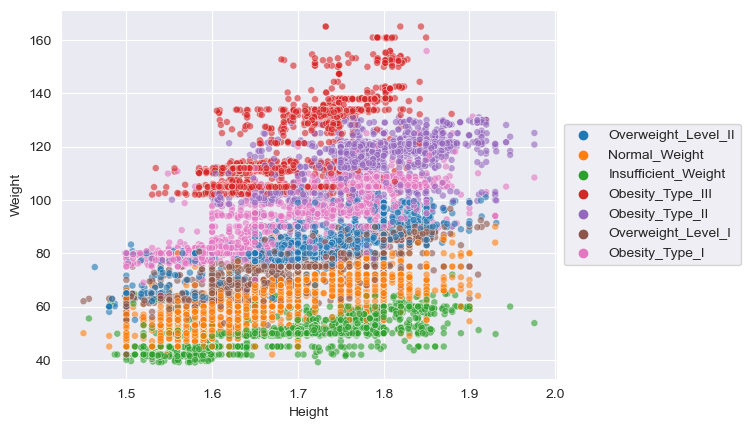

In [99]:
sns.scatterplot(x=all_data["Height"], y=all_data["Weight"], hue=all_data["NObeyesdad"],s=25, alpha=0.6),
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)),
plt.show()

### Split train, test

In [100]:
train_X, test_X, train_y, test_y = train_test_split(all_data.drop(columns=["NObeyesdad"]), all_data["NObeyesdad"], test_size=0.2, random_state=42)

In [101]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16606 entries, 9958 to 15795
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              16606 non-null  int64  
 1   Gender                          16606 non-null  object 
 2   Age                             16606 non-null  float64
 3   Height                          16606 non-null  float64
 4   Weight                          16606 non-null  float64
 5   family_history_with_overweight  16606 non-null  object 
 6   FAVC                            16606 non-null  object 
 7   FCVC                            16606 non-null  float64
 8   NCP                             16606 non-null  float64
 9   CAEC                            16606 non-null  object 
 10  SMOKE                           16606 non-null  object 
 11  CH2O                            16606 non-null  float64
 12  SCC                             16

In [102]:
train_y.info()

<class 'pandas.core.series.Series'>
Index: 16606 entries, 9958 to 15795
Series name: NObeyesdad
Non-Null Count  Dtype 
--------------  ----- 
16606 non-null  object
dtypes: object(1)
memory usage: 259.5+ KB


In [103]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

train_X_ohe = pd.get_dummies(train_X, columns=["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"])

results = cross_validate(DecisionTreeClassifier(), train_X_ohe, train_y, cv=5, scoring="accuracy")
results = pd.DataFrame(results)
results

,fit_time,score_time,test_score
0,0.108455,0.003008,0.820891
1,0.111791,0.002845,0.832279
2,0.107835,0.003205,0.839205
3,0.114155,0.002922,0.841614
4,0.108234,0.003052,0.844926


0.8302023121387283


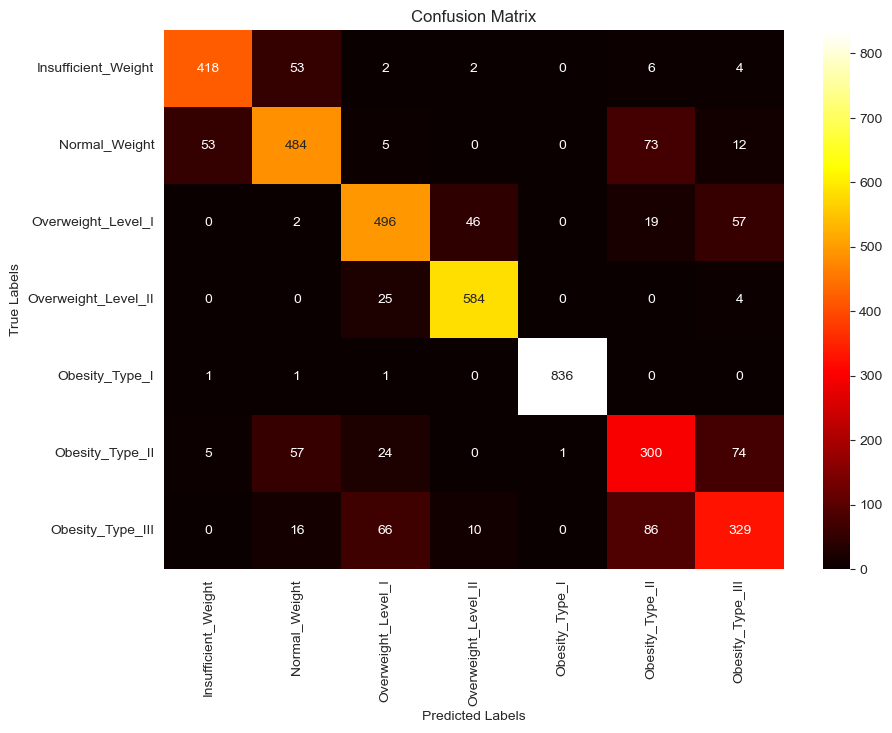

In [111]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

train_small_X, validate_X, train_small_y, validate_y = train_test_split(train_X_ohe, train_y, random_state=42)

model = DecisionTreeClassifier()
model.fit(train_small_X, train_small_y)
pred_validate_y = model.predict(validate_X)
print(model.score(validate_X, validate_y))

ordered_labels = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

def print_confusion_matrix(pred_y, true_y, classes):
    conf_matrix = confusion_matrix(pred_y, true_y, labels=classes)
    plt.figure(figsize=(10,7))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="hot", xticklabels=ordered_labels, yticklabels=ordered_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

print_confusion_matrix(pred_validate_y, validate_y, model.classes_)

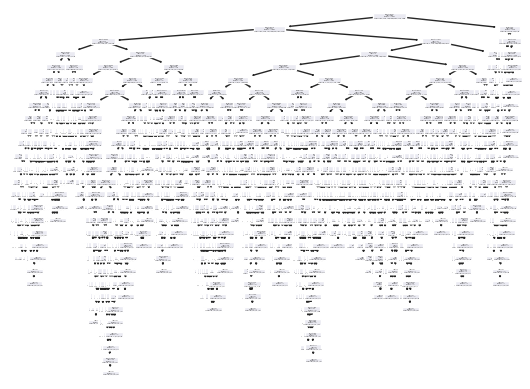

In [105]:
from sklearn.tree import plot_tree

plot_tree(model)
plt.show()

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

full_pipeline = Pipeline([
    ("model", DecisionTreeClassifier(random_state=42))
])

param_grid = [
    {
        "model__max_depth": [2, 4, 6, 8, 10, 15, 20],
    },
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=5, scoring="accuracy")
grid_search.fit(train_small_X, train_small_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid=[{'model__max_depth': [2, 4, 6, 8, 10, 15, 20]}],
             scoring='accuracy')

In [107]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.054724,0.000758,0.002307,0.000073,10,{'model__max_depth': 10},0.879165,0.857888,0.872340,0.871136,0.869478,0.870002,0.006895,1
3,0.046596,0.000577,0.002304,0.000051,8,{'model__max_depth': 8},0.869530,0.861100,0.868727,0.859494,0.865060,0.864782,0.003993,2
5,0.070072,0.000959,0.002397,0.000075,15,{'model__max_depth': 15},0.856283,0.847049,0.860297,0.853473,0.852610,0.853942,0.004367,3
2,0.039932,0.000871,0.002495,0.000186,6,{'model__max_depth': 6},0.848254,0.849859,0.845845,0.857888,0.855823,0.851534,0.004576,4
6,0.077428,0.001454,0.002406,0.000065,20,{'model__max_depth': 20},0.847049,0.835006,0.845444,0.834203,0.845783,0.841497,0.005659,5


In [110]:
grid_search.best_params_

{'model__max_depth': 10}

In [ ]:
pred_y = grid_search.best_estimator_.predict(validate_X)

In [109]:
grid_search.best_estimator_.score(validate_X, validate_y)

0.8653660886319846

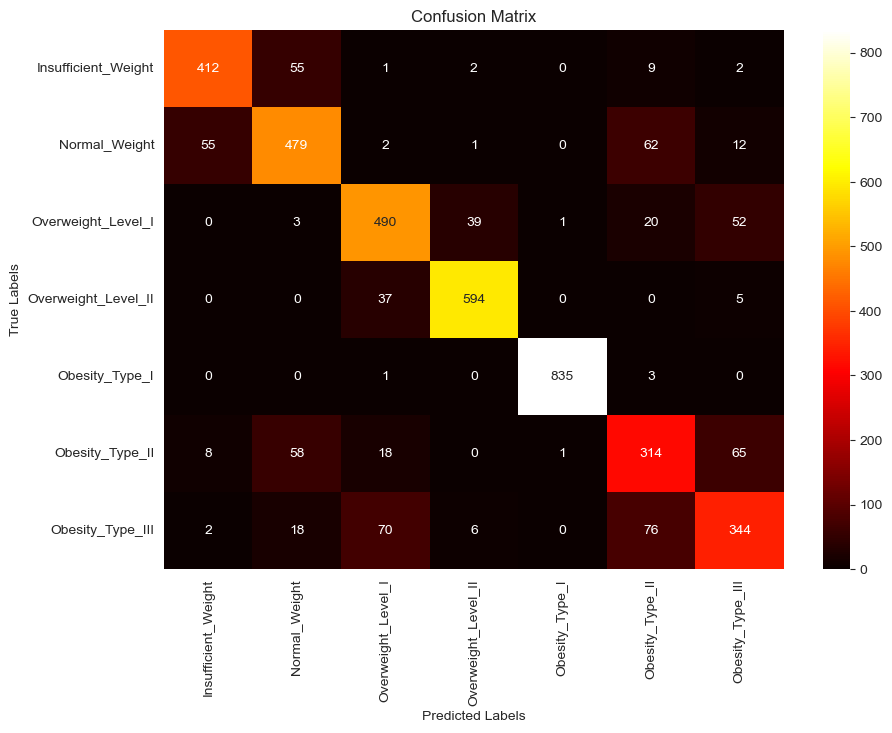

In [112]:
print_confusion_matrix(pred_y, validate_y, grid_search.best_estimator_.classes_)

### store train and test data

In [ ]:
train.to_csv('datahack_train.csv')
test.to_csv('datahack_train.csv')


## Visualisation
### Raw data table stats

In [ ]:
all_data.head()

In [ ]:
all_data.describe()

In [ ]:
all_data.info()

### overview plots

In [ ]:
sns.pairplot(all_data)

In [ ]:
all_data.hist()

### clear test and "all_data" variables

In [ ]:
test = None
all_data = None

### Sanity / data check

## Feature Engineering

## ⚠️ Parameter Documentation
### Seeds
    - data split: test_size 0.2, random_state=0
### Hyperparameter
### ..

## Model